<h3><b>Introduction to Data Analytics - Exercise set 4, exercise 3b</b></h3>
<h4><b>Storms dataset</b></h4>

<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_4/hurricane.png" />

<b>Tip:</b> You can just click "Run All" to see the results of this notebook. Some of these exercises have some heavy plots that can take even 1 minute to produce.

<b>Remember:</b> not every dataset has interesting correlations and/or features (too much randomness or variance usually, or not enough data). Also, not each correlation implies there's a causation. Finally, not every plot is useful, that's why it's important to try multiple plots in order to "see under the hood". Typically pair plots, joint plots, regression plots, heatmaps and box plots are most useful, but there are some exceptions too.

<h3><b>Quick summary of data:</b></h3>

<p>This datasets contains data about storms and hurricanes in the Atlantic. The data is from 1975 to 2021. Some older data has missing data. The status -column contains the storm classification, the category is based on Saffir-Simpson hurricane category (N/A, 0-5. 5 is most severe).</p>
<p>This dataset is also split into quantiles by pandas.</p>
<p>Original data: <a href="https://vincentarelbundock.github.io/Rdatasets/doc/dplyr/storms.html">https://vincentarelbundock.github.io/Rdatasets/doc/dplyr/storms.html</a></p>

<h3><b>Questions for this exercise:</b></h3>
<b>Answer the questions either as code comments or as markdown. Use separate cells to write your answers.</b><br/><br/>
<li>What determines a strong hurricane? This information is of course already in the category -column, but there seems to be two columns that define a strong hurricane. What are these variables, and how they seem to correlate with each other in case of a severe hurricane?</li>
<li>Based on the dataset, when is the most active hurricane season (months) in Atlantic?</li>
<li>Which seaborn plots are useful in this notebook, and which are not? Why? (you can remove the unnecessary plots from this notebook if you wish too).</li>
<li>Which are more useful in this case, correlations or plots? Or are they both useful?</li>

<b>Extra questions/tasks for extra points:</b>
<li>Based on this dataset, which hurricanes in this dataset seem to be strongest, and what were they called? (use Google). Note that actual statistics might differ from this dataset, since this dataset is only a sample of observations. (tip: in addition to looking at the seaborn plots, you can also inspect the pandas DataFrames)</li>
<li>The strongest hurricanes in the dataset seem to show a certain behavior when it comes to time. When does this happen (clockwise) and can you find an explanation for this by using Google?</li>
<li>This notebook mostly concentrates on the top 25% hurricanes. Can you find something interesting in the other quantiles?</li>
<li>Any other ideas about this dataset? Any ways to expand or improve the dataset and the analysis?</li>


<hr />

#### **Results and summary:**
- **Affects hurricane category:**
    - Two most factors that affect hurricane category are wind speed and air pressure. Wind has correlation of 0.89 and air pressure has -0.87. Negative correlation is due to dropping air pressure in the center of the storm. Wind increases and air pressure decreases when gategory gets bigger.
    - Most active hurricane season in the Atlantic is from July to September. This is due to warm ocean after summer months. Water's energy that evaporates and creates clouds.
- **Useful plots:**
    - Again lmplots and boxplots tell the story better than heatmaps. Also pairplots are usefull now with few strongly correlating values.
    - sns.lmplot(x='month', y='wind', data=df1, hue='category')
    - sns.lmplot(x='year', y='wind', data=df1, hue='status')
    - sns.lmplot(x='year', y='pressure', data=df1, hue='category')
    - sns.boxplot(x='category', y='wind', data=df1, hue='status')
    - sns.boxplot(x='category', y='pressure', data=df1, hue='status')
- **Not so useful plots:**
    - sns.lmplot(x='year', y='hurricane_force_diameter', data=df1, hue='status')
    - Heatmaps have some information, but compared to plot they don't have anything extra. You can see clearly how wind and pressure correlate to category, but nothing more.
- **Extra questions:**
    - In 2007 there was two category 5 hurricane in Atlantic: Dean and Felix (https://en.wikipedia.org/wiki/2007_Atlantic_hurricane_season). Based on plot using year 2007 data, cat5 hurricanes were in September. 
        - This dataset has only Felix in year 2007 that is catergory 5.
    - In 2017 there was also two category 5 hurricanes Irma and Maria (https://en.wikipedia.org/wiki/2017_Atlantic_hurricane_season), and also in September.
        - But in this dataset there is only one cat5 hurricane: Maria.
        - This means dataset is not complete.
    - Strongest hurricanes in this dataset are: Maria (2017) and Felix (2007).
        - Maria had lowest air pressure.
        - Both had 150 knots winds.
    - Looks like hurricane's category changes over time. Usually they grow before reaching land and start to weaken. This is also seen in data.

<hr />

<h4><b>Imports and load the original dataset</b></h4>

In [1]:
# import the common data analytics modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load dataset
df = pd.read_csv('storms.csv')

# coordinates not needed at this point, remove
df = df.drop('lat', axis=1)
df = df.drop('long', axis=1)

# handle missing values, since seaborn (or machine learning) doesn't work with them

# if category is missing, fill with category 0 (least severe)
df['category'] = df['category'].fillna(0)

# if diameters are missing, fill with 0
df['tropicalstorm_force_diameter'] = df['tropicalstorm_force_diameter'].fillna(0)
df['hurricane_force_diameter'] = df['hurricane_force_diameter'].fillna(0)

# whatever is left with missing data, remove it
df = df.dropna()

# day brings too much variance in the dataset, remove it
df = df.drop('day', axis=1)

# finally, reset index and drop the original index
df = df.reset_index()
df = df.drop('index', axis=1)
del df[df.columns[0]]

# group by name of the hurricane as well as wind and pressure
values = df.groupby('name').sum(numeric_only=True).sort_values(by=['wind', 'pressure'], ascending=False)

# split to quantiles
df_highest = list(values.query('wind >= wind.quantile(q=0.94)').index)
df_average_plus = list(values.query('wind >= wind.quantile(q=0.68) and wind < wind.quantile(q=0.94)').index)
df_average_minus = list(values.query('wind >= wind.quantile(q=0.25) and wind < wind.quantile(q=0.68)').index)
df_lowest = list(values.query('wind < wind.quantile(q=0.25)').index)

# create dataframes based on quantile hurricanes
df1 = df[df['name'].isin(df_highest)]
df2 = df[df['name'].isin(df_average_plus)]
df3 = df[df['name'].isin(df_average_minus)]
df4 = df[df['name'].isin(df_lowest)]

# correlation matrices
correlations = df.corr(numeric_only=True)
correlations1 = df1.corr(numeric_only=True)
correlations2 = df2.corr(numeric_only=True)
correlations3 = df3.corr(numeric_only=True)
correlations4 = df4.corr(numeric_only=True)

<h4><b>seaborn plots - pairplots</b></h4>

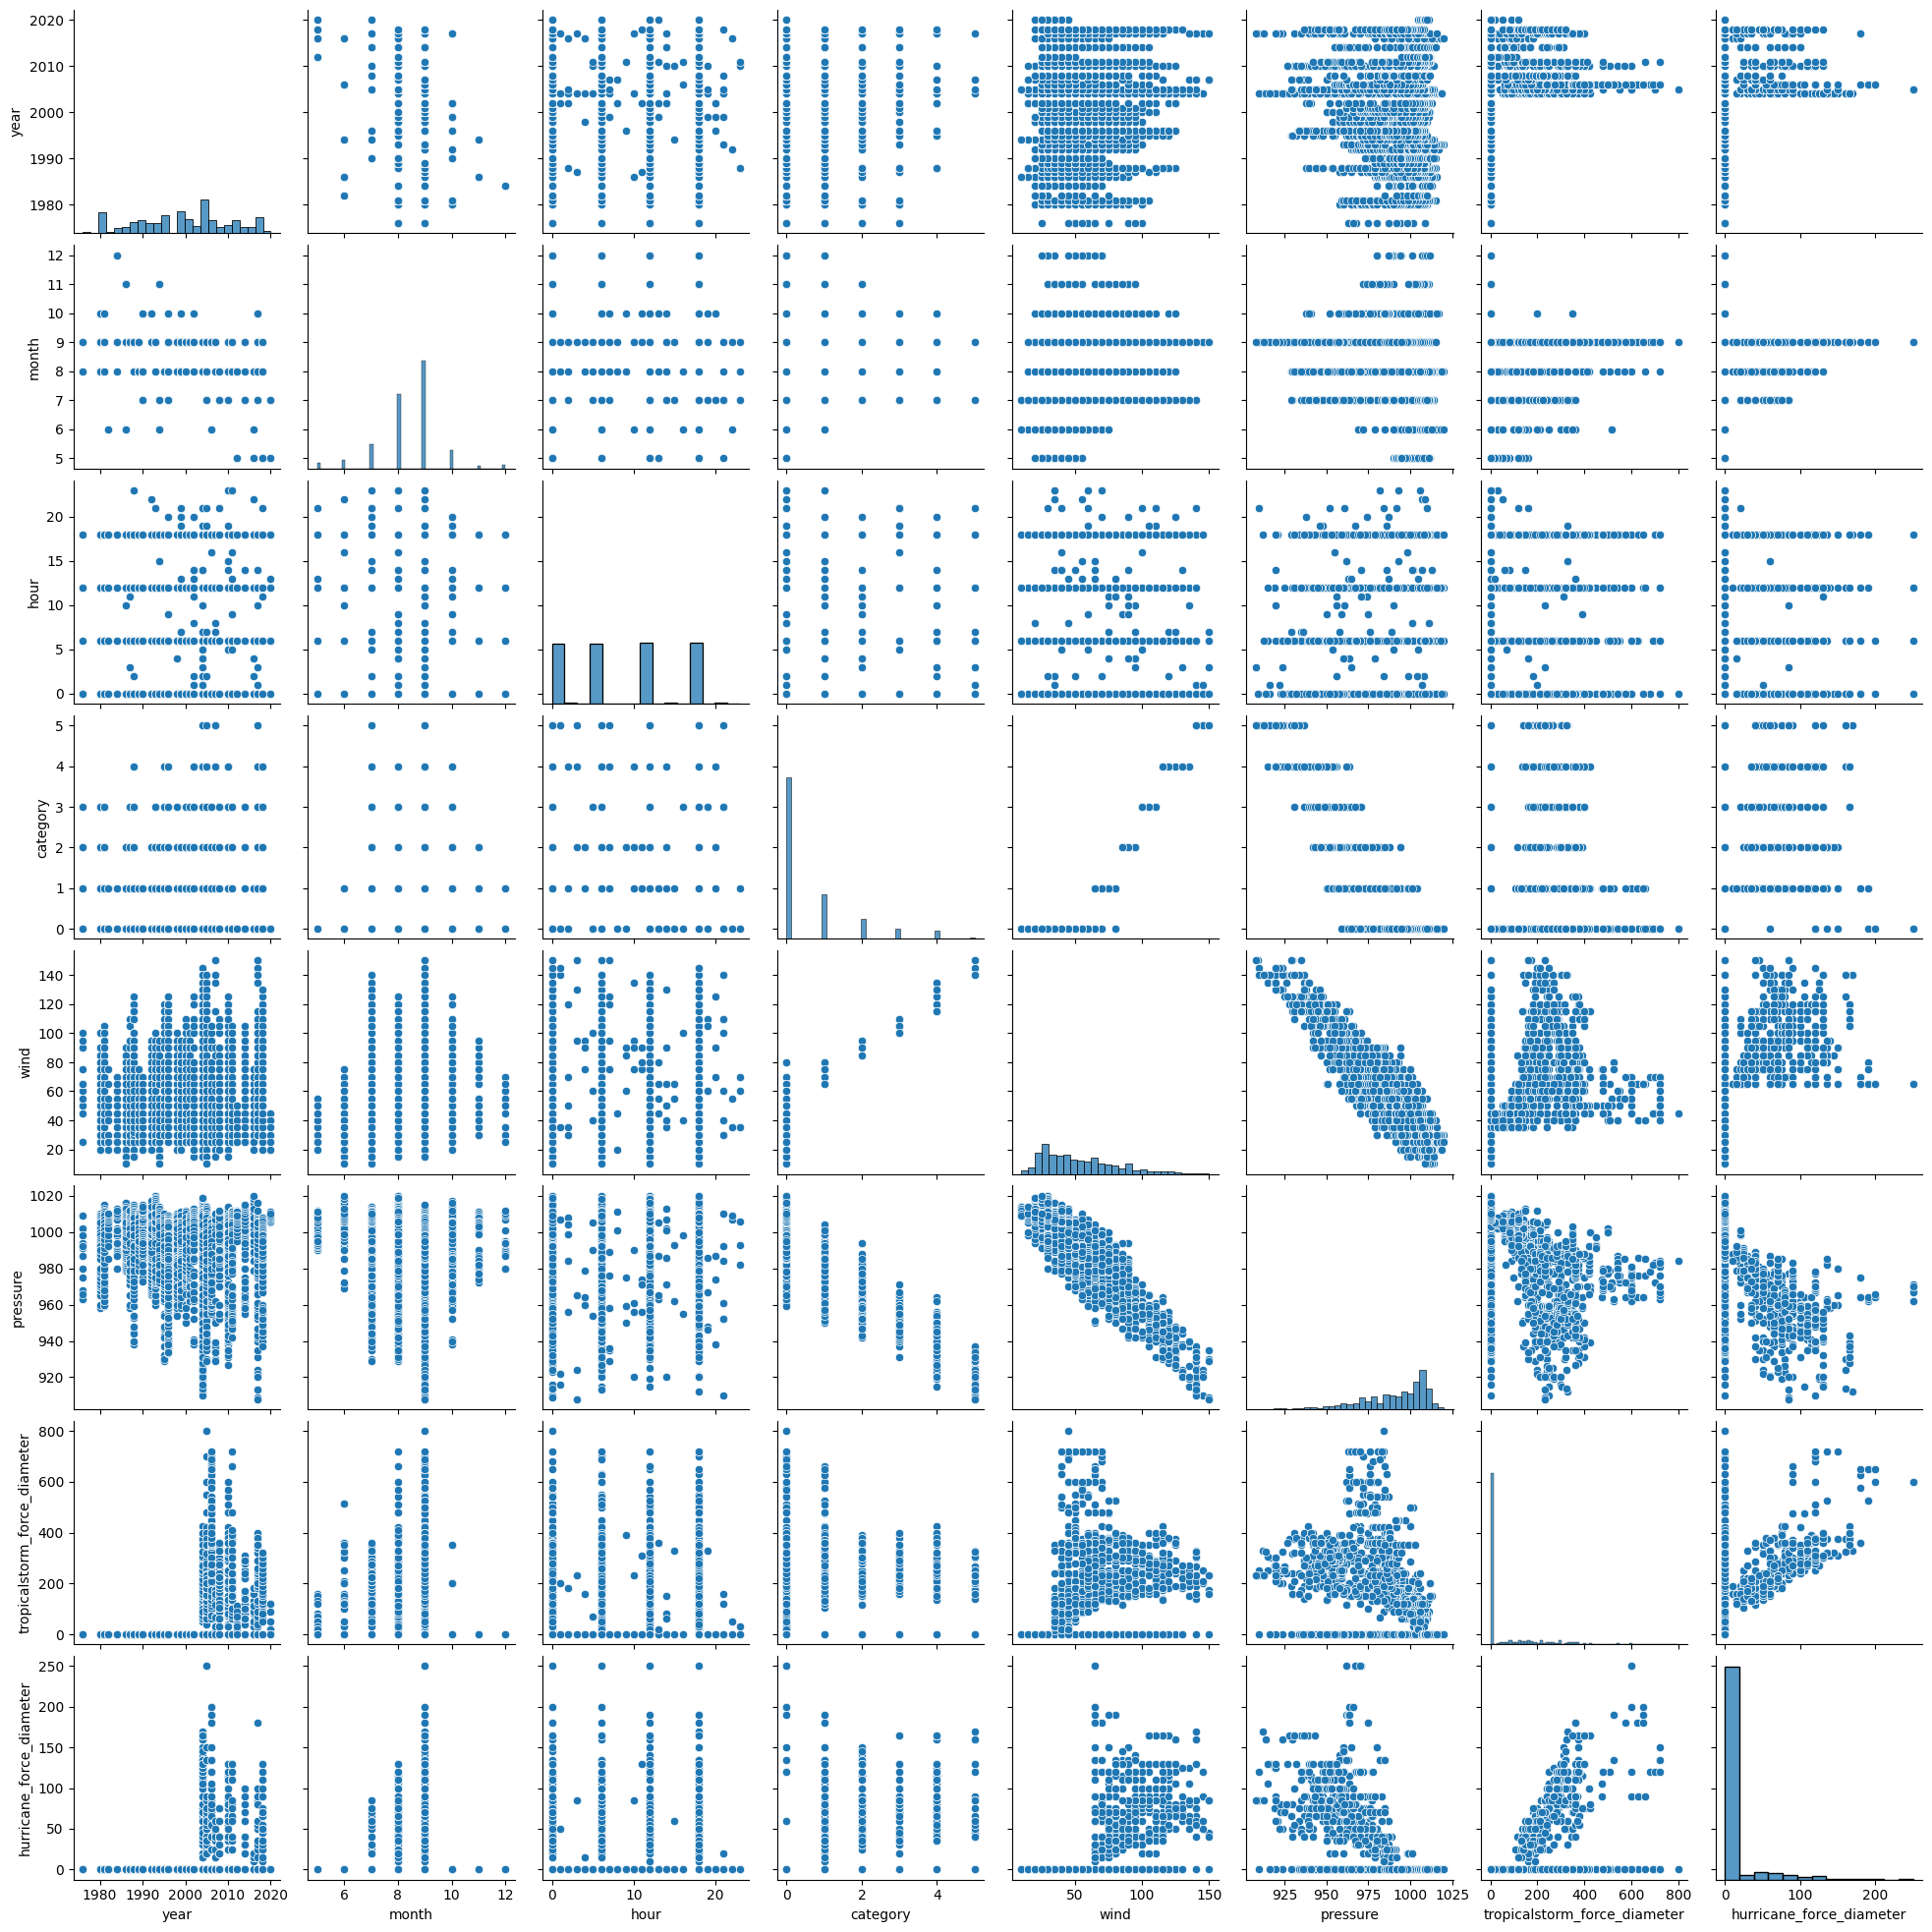

In [3]:
# basic pair plot
sns.pairplot(df1)

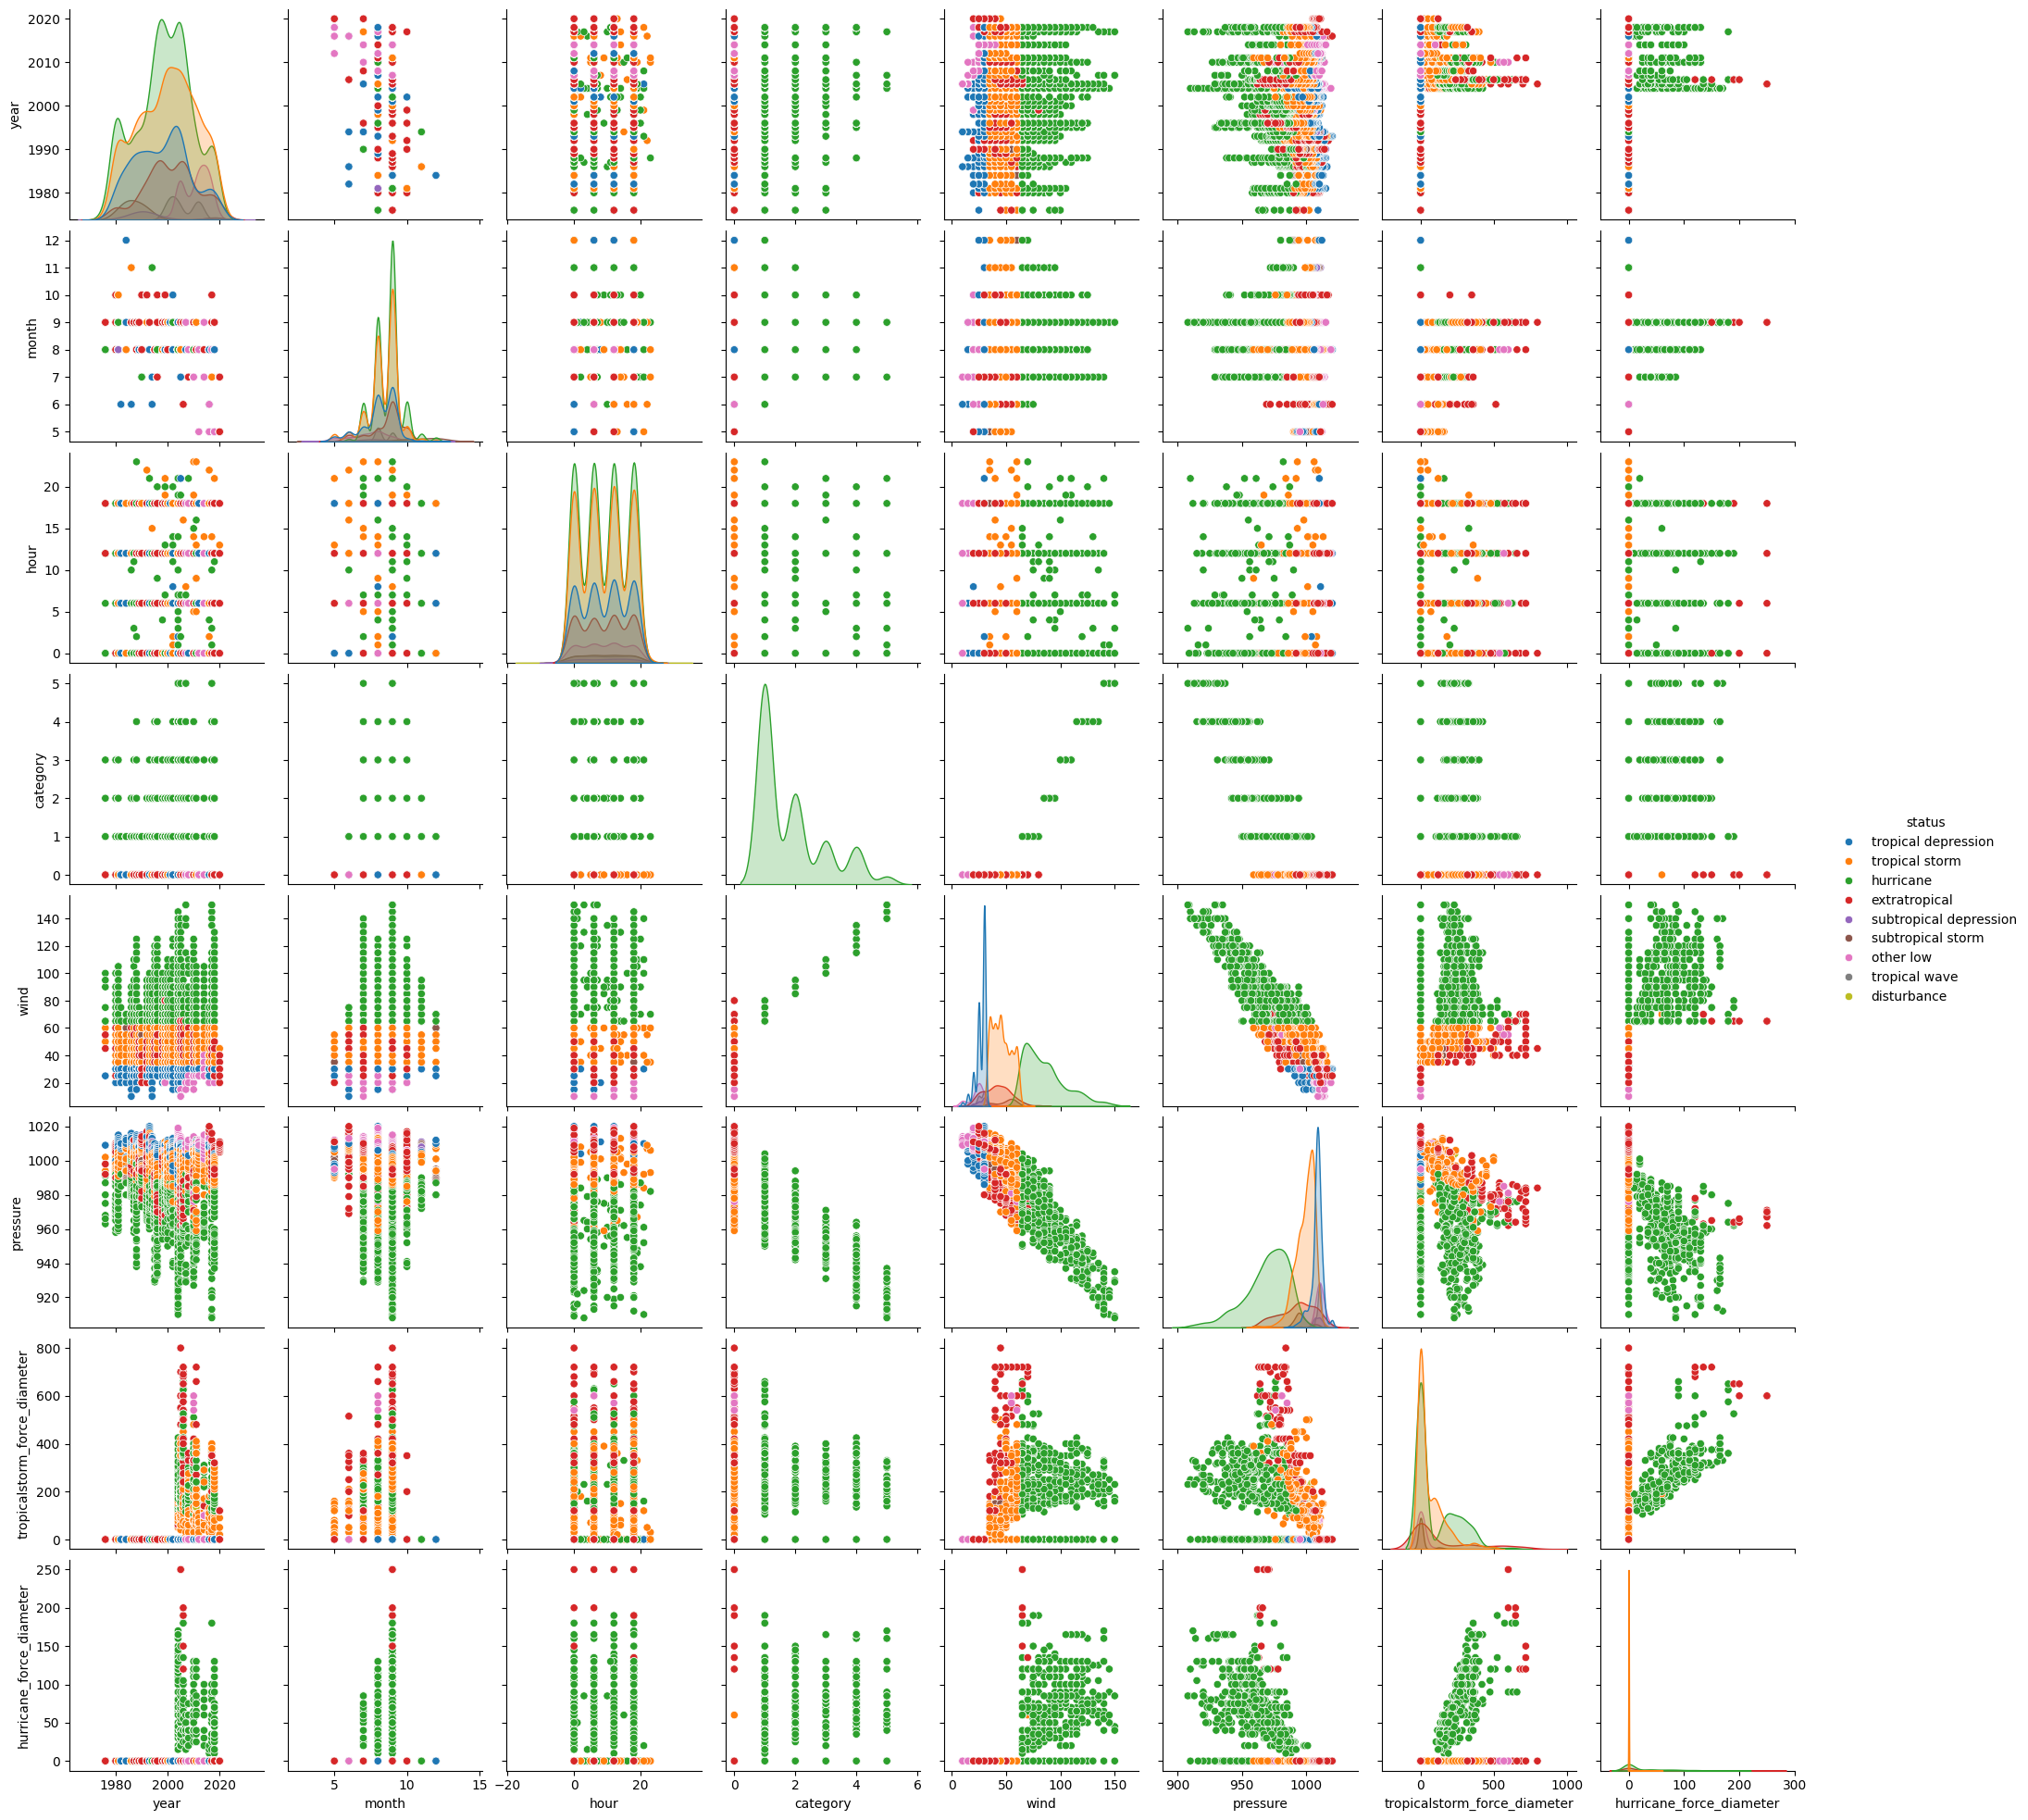

In [4]:
# basic pair plot, hue on status
sns.pairplot(df1, hue="status")

<h4><b>seaborn plots - heatmaps</b></h4>

<Axes: xlabel='year', ylabel='month'>

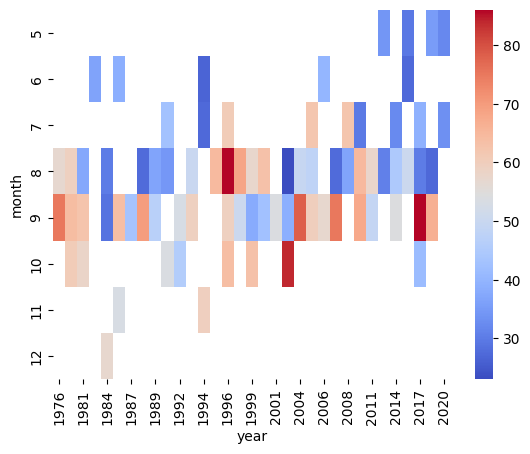

In [5]:
# pivot table + heatmap for month/year and wind
pt = df1.pivot_table(index='month', columns='year', values='wind')
sns.heatmap(pt, cmap='coolwarm')

<Axes: xlabel='year', ylabel='month'>

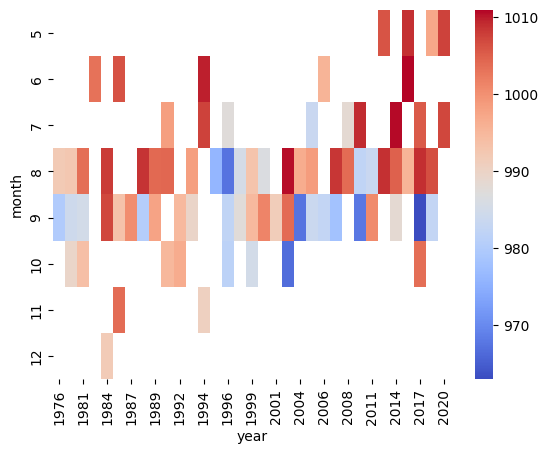

In [6]:
# pivot table + heatmap for month/year and pressure
pt = df1.pivot_table(index='month', columns='year', values='pressure')
sns.heatmap(pt, cmap='coolwarm')

<Axes: xlabel='hour', ylabel='month'>

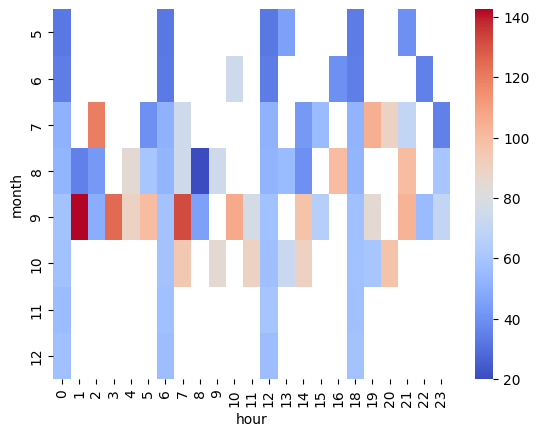

In [7]:
# pivot table + heatmap for month/year and wind
pt = df1.pivot_table(index='month', columns='hour', values='wind')
sns.heatmap(pt, cmap='coolwarm')

<Axes: xlabel='hour', ylabel='month'>

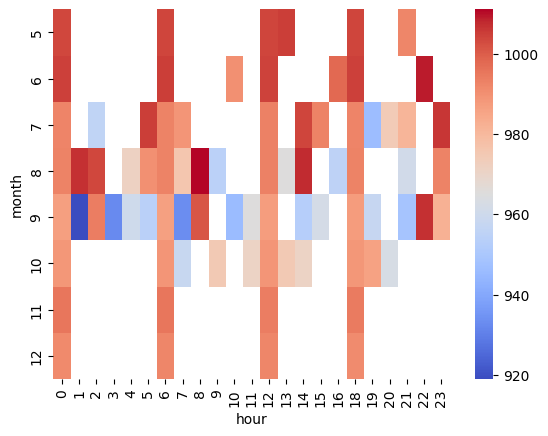

In [8]:
# pivot table + heatmap for month/year and pressure
pt = df1.pivot_table(index='month', columns='hour', values='pressure')
sns.heatmap(pt, cmap='coolwarm')

<h4><b>seaborn plots - regression plots</b></h4>

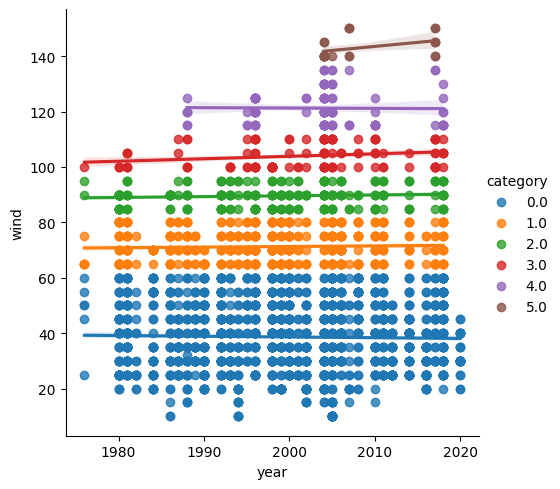

In [9]:
# regression plot for wind/year, hue on category
sns.lmplot(x='year', y='wind', data=df1, hue='category')

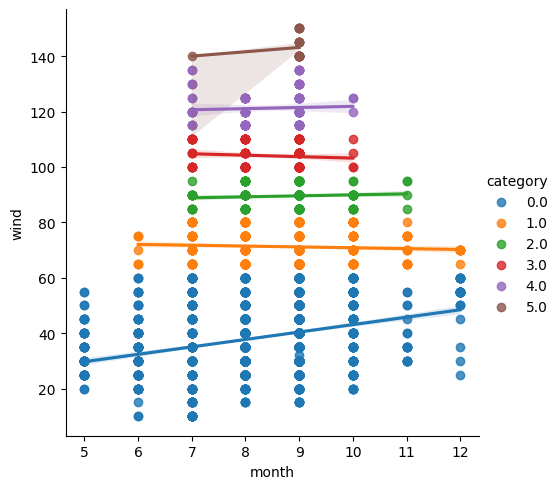

In [10]:
# regression plot for wind/month, hue on category
sns.lmplot(x='month', y='wind', data=df1, hue='category')

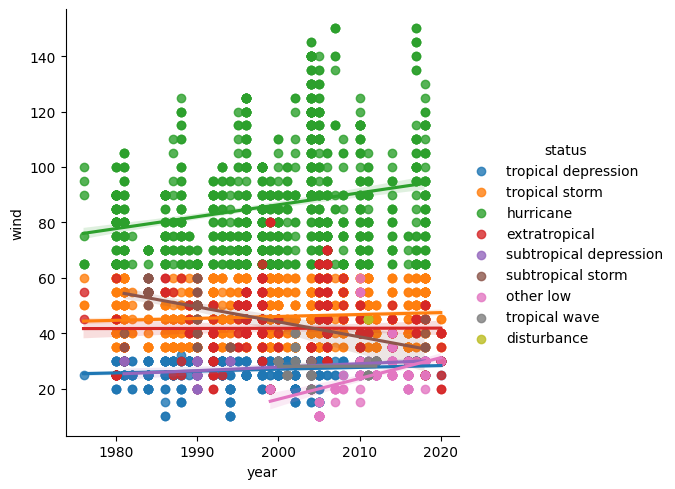

In [11]:
# regression plot for wind/year, hue on status
sns.lmplot( x='year', y='wind', data=df1, hue='status')

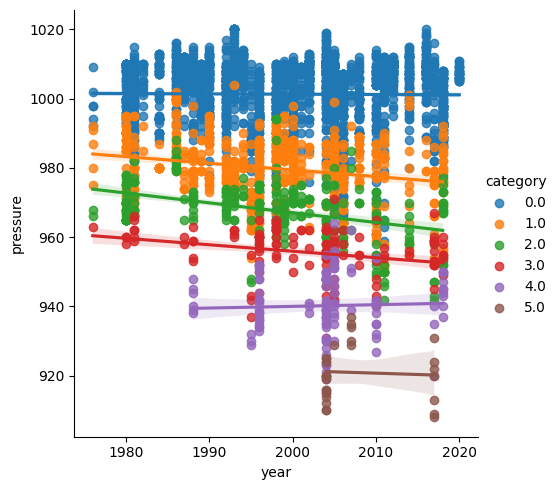

In [12]:
# regression plot for pressure/year, hue on category
sns.lmplot(x='year', y='pressure', data=df1, hue='category')

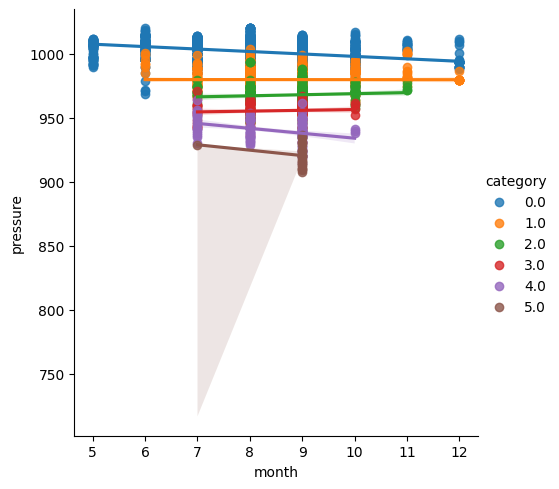

In [13]:
# regression plot for pressure/month, hue on category
sns.lmplot(x='month', y='pressure', data=df1, hue='category')

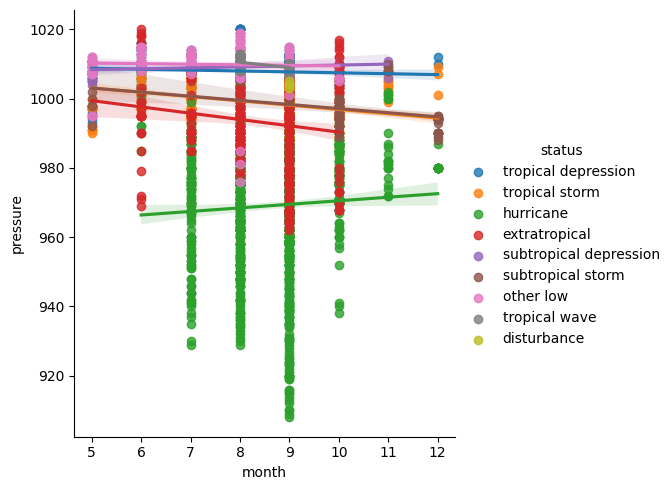

In [14]:
# regression plot for pressure_month, hue on status
sns.lmplot(x='month', y='pressure', data=df1, hue='status')

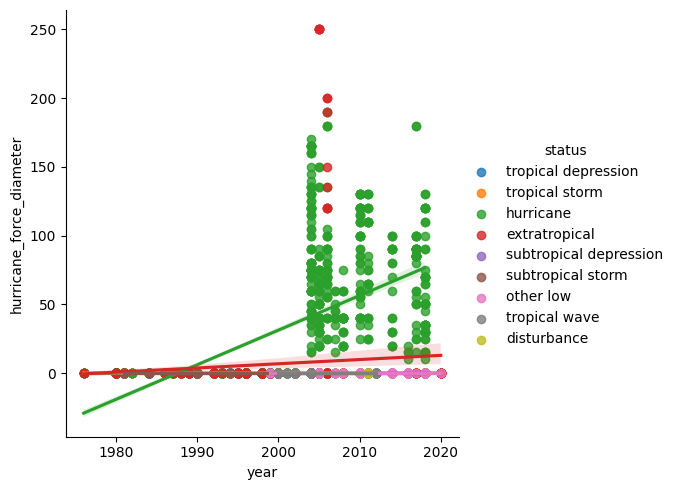

In [15]:
# regression plot for hurricane force diameter and year, hue on status
sns.lmplot(x='year', y='hurricane_force_diameter', data=df1, hue='status')

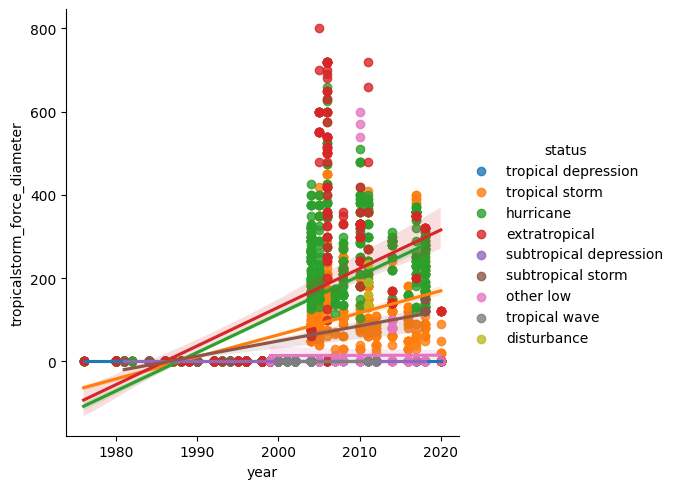

In [16]:
# regression plot for tropical storm diameter and year, hue on status
sns.lmplot(x='year', y='tropicalstorm_force_diameter', data=df1, hue='status')

<h4><b>seaborn plots - boxplots</b></h4>

<Axes: xlabel='category', ylabel='wind'>

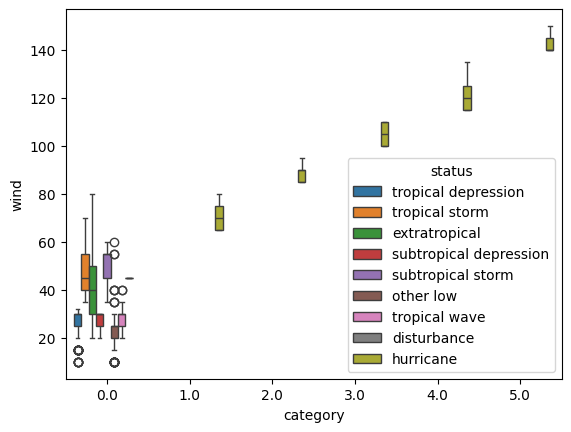

In [17]:
# boxplot, category/wind, hue on status
sns.boxplot(x='category', y='wind', data=df1, hue='status')

<Axes: xlabel='category', ylabel='pressure'>

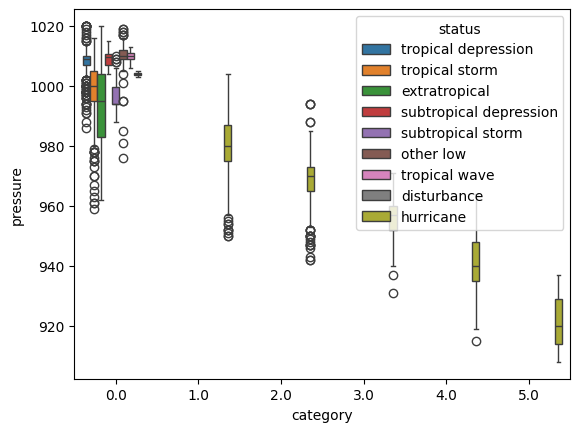

In [18]:
# boxplot, category/pressure, hue on status
sns.boxplot(x='category', y='pressure', data=df1, hue='status')

<Axes: xlabel='category', ylabel='hurricane_force_diameter'>

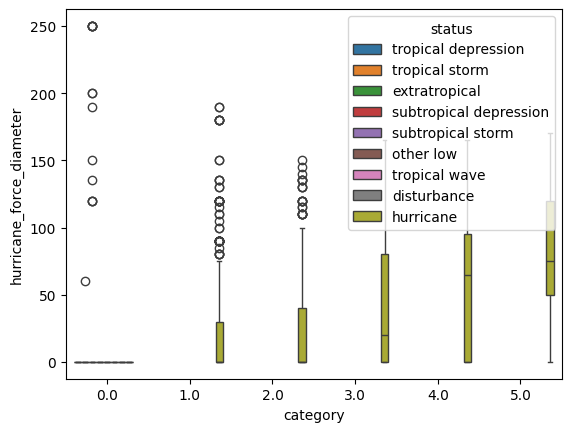

In [19]:
# boxplot, category/hurricane force diameter, hue on status
sns.boxplot(x='category', y='hurricane_force_diameter', data=df1, hue='status')

<h4><b>seaborn plots - heatmaps for correlations matrices</b></h4>

<Axes: >

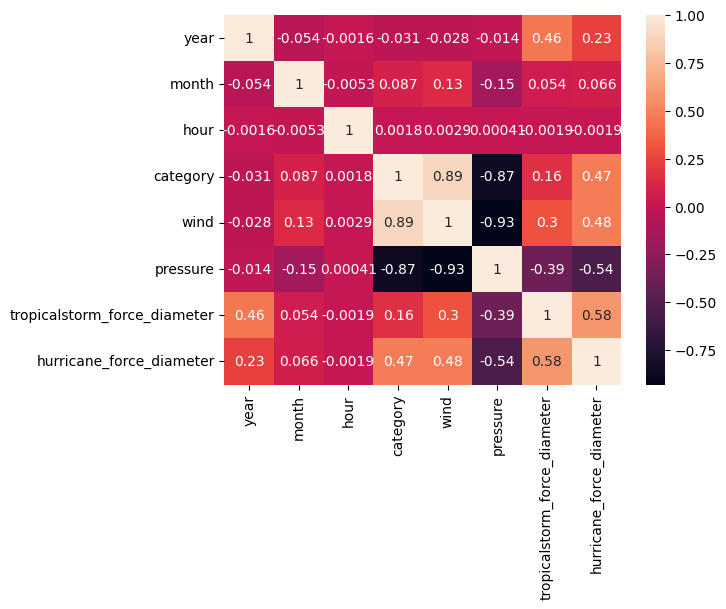

In [20]:
# correlation matrix heatmap, whole dataset
sns.heatmap(correlations, annot=True)

<Axes: >

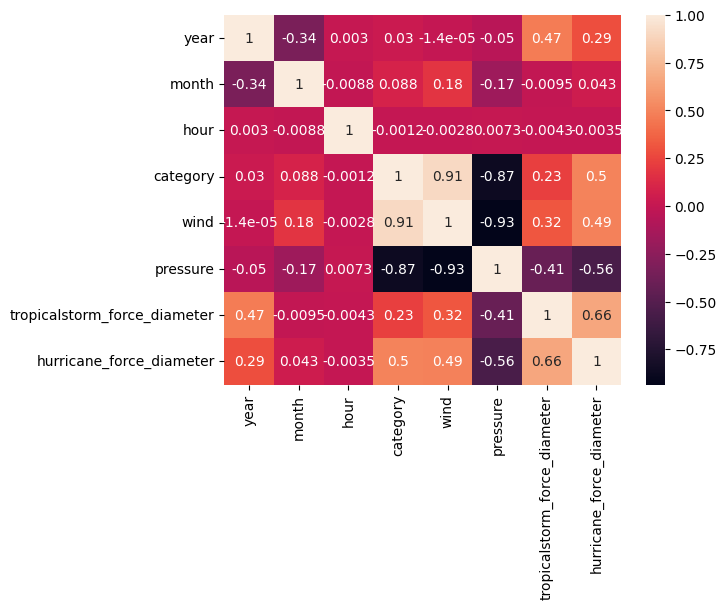

In [21]:
# correlation matrix heatmap for top hurricanes
sns.heatmap(correlations1, annot=True)

#### **Plot extra questions**

In [22]:
# Find out what category 5 hurricanes there are
cat5 = df1[df1['category'] >= 5]
cat5

,name,year,month,hour,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
9732,Ivan,2004,9,6,hurricane,5.0,140,925,265.0,75.0
9733,Ivan,2004,9,12,hurricane,5.0,140,919,265.0,75.0
9743,Ivan,2004,9,18,hurricane,5.0,145,920,250.0,90.0
9744,Ivan,2004,9,0,hurricane,5.0,145,910,250.0,120.0
9749,Ivan,2004,9,0,hurricane,5.0,140,916,300.0,130.0
9750,Ivan,2004,9,6,hurricane,5.0,140,920,300.0,130.0
9751,Ivan,2004,9,12,hurricane,5.0,140,915,305.0,130.0
9752,Ivan,2004,9,18,hurricane,5.0,140,912,330.0,170.0
9753,Ivan,2004,9,21,hurricane,5.0,140,910,0.0,0.0
9754,Ivan,2004,9,0,hurricane,5.0,140,914,325.0,160.0


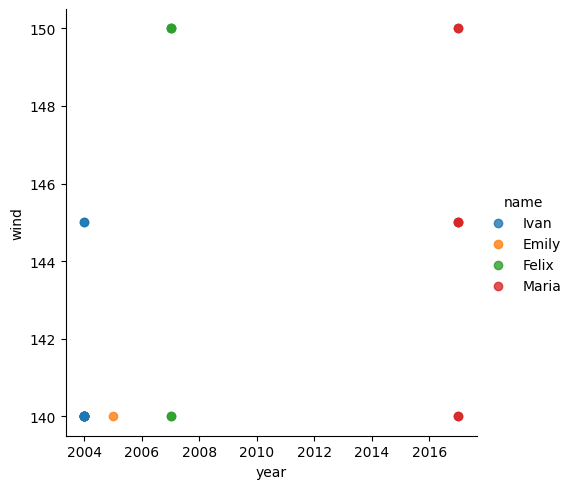

In [23]:
# Plot category 5 hurricanes by year and wind, name as hue
sns.lmplot(x='year', y='wind', data=cat5, hue='name')

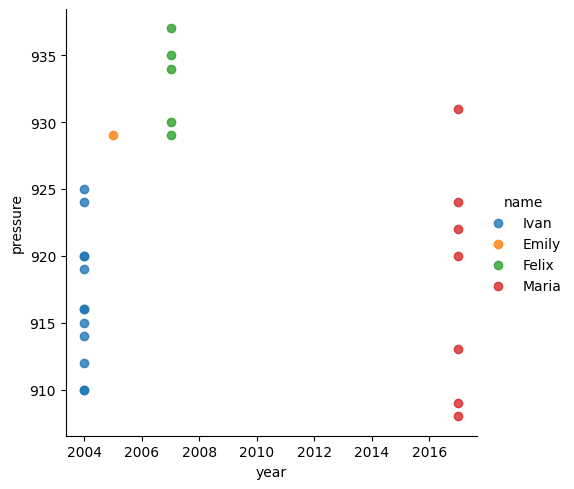

In [24]:
# Plot category 5 hurricanes by year and pressure, name as hue
sns.lmplot(x='year', y='pressure', data=cat5, hue='name')

In [25]:
# Select data from 2007
# There is only one hurricane: Felix
year_2007 = cat5.query('year == 2007')
year_2007

,name,year,month,hour,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
11428,Felix,2007,9,0,hurricane,5.0,150,935,175.0,45.0
11429,Felix,2007,9,6,hurricane,5.0,150,930,160.0,40.0
11430,Felix,2007,9,7,hurricane,5.0,150,929,0.0,0.0
11431,Felix,2007,9,12,hurricane,5.0,140,937,140.0,40.0
11435,Felix,2007,9,12,hurricane,5.0,140,934,160.0,60.0


In [26]:
# Select year 2017 and category
# Again there is only one hurricane
year_2017 = cat5.query("year == 2017")
year_2017

,name,year,month,hour,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
16375,Maria,2017,9,0,hurricane,5.0,145,924,200.0,50.0
16376,Maria,2017,9,1,hurricane,5.0,145,922,200.0,50.0
16378,Maria,2017,9,12,hurricane,5.0,140,931,210.0,55.0
16379,Maria,2017,9,18,hurricane,5.0,145,920,210.0,60.0
16380,Maria,2017,9,0,hurricane,5.0,150,909,230.0,85.0
16381,Maria,2017,9,3,hurricane,5.0,150,908,230.0,85.0
16382,Maria,2017,9,6,hurricane,5.0,140,913,230.0,85.0
